  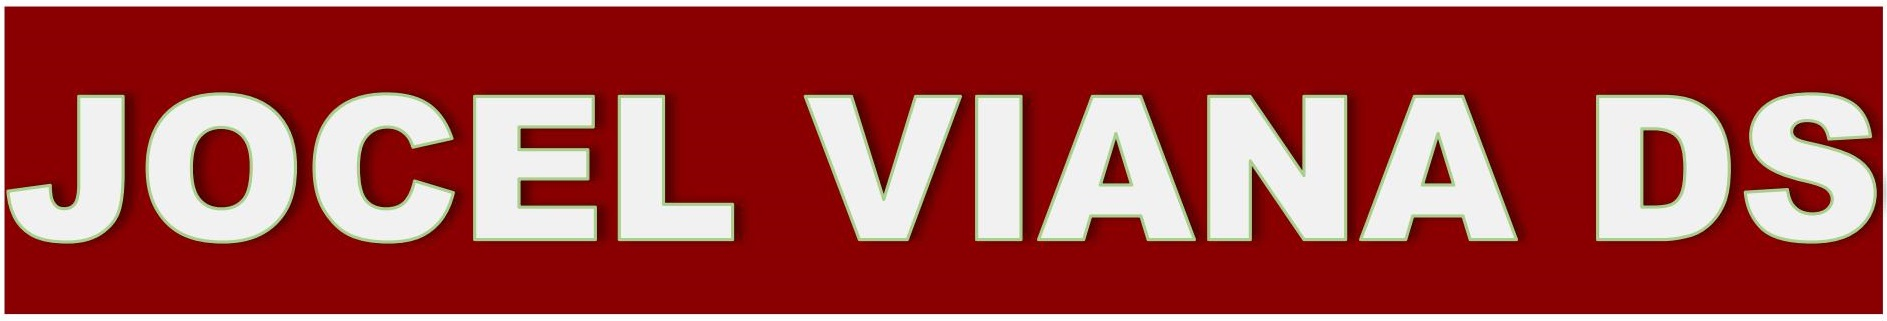

>



# **1ª PARTE - Extraindo insights**

## **SISTEMA DE PREVISÃO DE DOENÇAS** **RENAIS**

##PROBLEMA DE NEGÓCIO


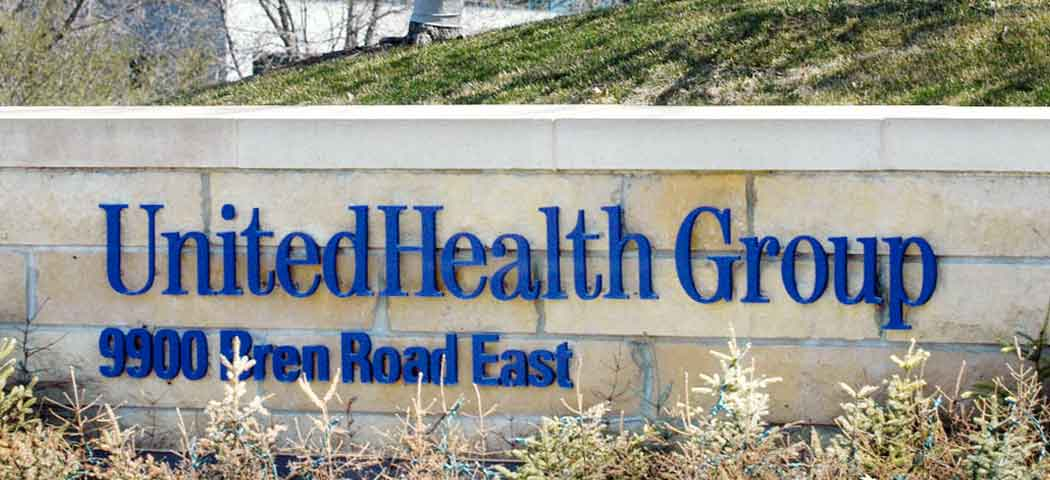

*O* ***Data Healthcare Group*** *é um grande* *Conglomerado* *Internacional da área da saúde. Atualmente, possui cerca de* *100 mil funcionários, e presta serviços de saúde para 75* *milhões de pessoas, atuando em 50 estados americanos e 17* *nações ao redor do mundo*.  

*O Grupo atua em diferentes mercados, tais como Hospitais, planos de saúde e benefícios para empregados, militares e aposentados, sistemas de tecnologia da informação em saúde, e programas de saúde para o setor público, dentre outros.*

*Em 2021, foi **a maior empresa do ramo de saúde do mercado americano**, a frente de empresas como WellPoint Inc., CIGNA Health Insurance Company entre outras.*

*Atualmente, o Grupo Adquiriu um Hospital especializado em Nefrologia para atuar nesse ramo, que é considerada uma das categorias com maiores demandas no mercado de saúde.*

*Neste trabalho, será desenvolvido um **Sistema de Previsão de Doenças Renais** para auxiliar os médicos na identificação das doenças crônicas dos rins.*


### OBTENÇÃO DOS DADOS

**Fonte de Dados**: Para desenvolver o Sistema de Previsão de Doenças Renais com Machine Learning, foram fornecidos dados de pacientes coletados pelo Group, que estão no arquivo: "Kidney_data.csv".

https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease#


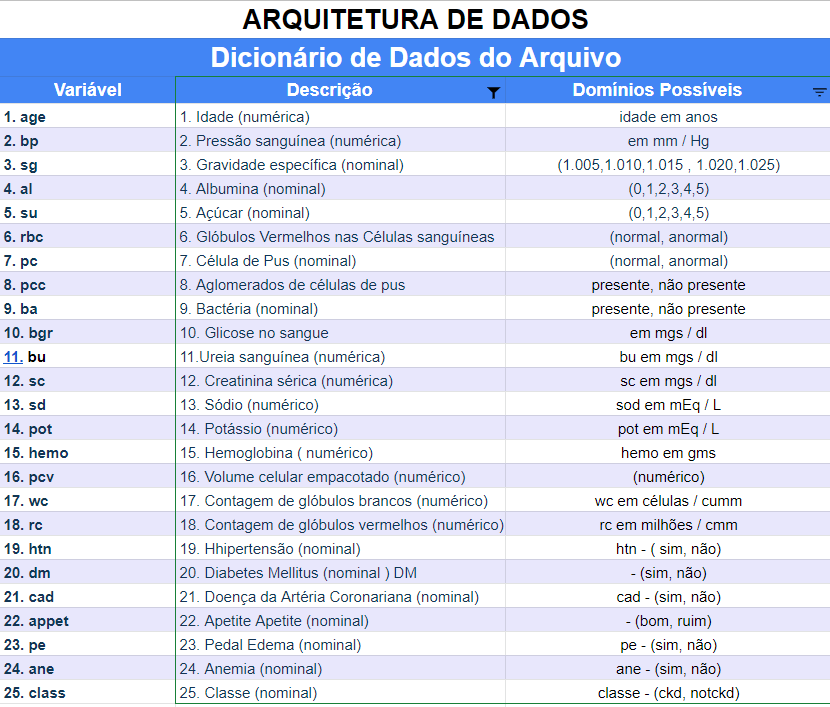

### CONEXÃO COM OS DADOS

In [ ]:
# Importação de bibliotecas e pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Carregamento da base dados
df = pd.read_csv('Kidney_data.csv')

### VISUALIZAÇÃO DOS PRIMEIROS REGISTROS DO DATASET

In [ ]:
# Visualizar as primeiras 5 linhas
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


### DIMENSÕES DO DATASET E SUAS VARIÁVEIS

In [ ]:
# Dimensões (shape)
df.shape

(400, 26)

In [ ]:
# Informações adicionais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
# Verificando se há valores ausentes (missing/NaN)
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
# Verificar se existe linhas duplicadas
df.duplicated().sum()

0

In [ ]:
# Informações estatísticas das variáveis
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


### ESTUDO DAS VARIÁVEIS

**VARIÁVEL Target (TEVE OU NÃO DOENÇAS NOS RINS)**

A tabela de frequência da variável "classification",  nossa Classe ou Label ou Target ou Y ou Variável a ser Predita (o que a gente quer descobrir)

In [ ]:
# Tabela de frequência
df['classification'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

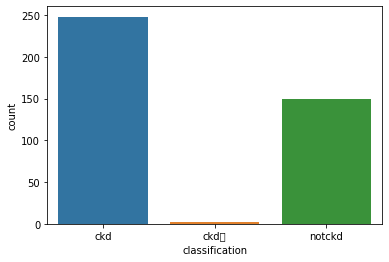

In [ ]:
# Gráfico de barras para variáveis categóricas
sns.countplot(df['classification']);

**VARIÁVEL "rbc" (GLÓBULOS VERMELHOS)**

In [ ]:
# Tabela de frequência
df['rbc'].value_counts()

normal      201
abnormal     47
Name: rbc, dtype: int64

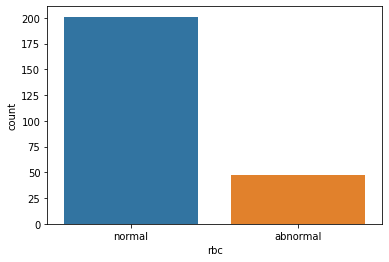

In [ ]:
# Gráfico de barras
sns.countplot(df['rbc']);

**VARIÁVEL "ba" (PRESENÇA DE BACTÉRIAS)**

In [ ]:
# Frequência
df['ba'].value_counts()

notpresent    374
present        22
Name: ba, dtype: int64

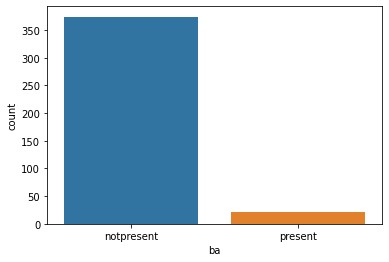

In [ ]:
# Gráfico
sns.countplot(df['ba']);

**VARIÁVEL "pc" (PUS)**

In [ ]:
# Frequência
df['pc'].value_counts()

normal      259
abnormal     76
Name: pc, dtype: int64

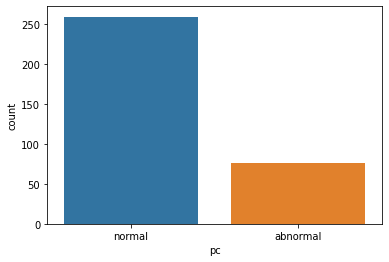

In [ ]:
# Gráfico
sns.countplot(df['pc']);

**VARIÁVEL "age" (IDADE)**

In [ ]:
# Frequência
df['age'].value_counts()

60.0    19
65.0    17
48.0    12
55.0    12
50.0    12
        ..
83.0     1
27.0     1
14.0     1
81.0     1
79.0     1
Name: age, Length: 76, dtype: int64

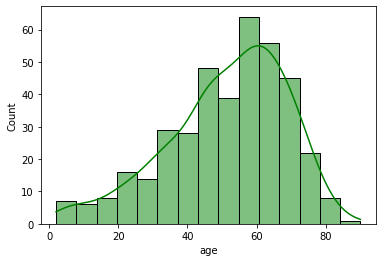

In [ ]:
# Gráfico
sns.histplot(df['age'], kde=True, color='green');

## PROCESSAMENTO DOS DADOS

**Nessa parte do projeto, farei o processamento dos dados tais como:**


*   *Tratar valores faltantes*
*   *Eliminar registros duplicados*
*   *Deixar as variáveis na mesma escala*
*   *Converter variáveis "object" em numéricas*
*   *Eliminar variáveis que não ajudarão na previsão*
*   *Criar novas variáveis* 
*   *Demais tratamentos para criar a máquina preditiva*









In [ ]:
# Veirificar o tipo das variáveis
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [ ]:
# Eliminar variáveis não necessárias ("id" não é necessário)
df = df.drop('id', axis = 1)

### SUBSTITUIÇÃO DE VARIÁVEIS CATEGÓRICAS EM NUMÉRICAS

***Nessa parte, será substituídas variáveis "object" em numéricas, já que o modelo não lida muito bem com variáveis categóricas***

 **"rbc"**

In [ ]:
# Frequência
df['rbc'].value_counts()

normal      201
abnormal     47
Name: rbc, dtype: int64

In [ ]:
# Fazendo a substituição
df['rbc'] = df['rbc'].replace(to_replace={'normal':0, 'abnormal':1})

In [ ]:
# Frequência
df['rbc'].value_counts()

0.0    201
1.0     47
Name: rbc, dtype: int64

**"pc"**

In [ ]:
# Frequência
df['pc'].value_counts()

normal      259
abnormal     76
Name: pc, dtype: int64

In [ ]:
# Fazendo a substituição
df['pc'] = df['pc'].replace(to_replace={'normal':0, 'abnormal':1})

In [ ]:
# Frequência
df['pc'].value_counts()

0.0    259
1.0     76
Name: pc, dtype: int64

**"pcc"**

In [ ]:
# Frequência
df['pcc'].value_counts()

notpresent    354
present        42
Name: pcc, dtype: int64

In [ ]:
# Fazendo a substituição
df['pcc'] = df['pcc'].replace(to_replace={'notpresent':0, 'present':1})

In [ ]:
# Frequência
df['pcc'].value_counts()

0.0    354
1.0     42
Name: pcc, dtype: int64

**"ba"**

In [ ]:
# Frequência
df['ba'].value_counts()

notpresent    374
present        22
Name: ba, dtype: int64

In [ ]:
# Fazendo a substituição
df['ba'] = df['ba'].replace(to_replace={'notpresent':0, 'present':1})

In [ ]:
# Frequência
df['ba'].value_counts()

0.0    374
1.0     22
Name: ba, dtype: int64

**htn**

In [ ]:
# Frequência
df['htn'].value_counts()

no     251
yes    147
Name: htn, dtype: int64

In [ ]:
# Fazendo a substituição
df['htn'] = df['htn'].replace(to_replace={'no':0, 'yes':1})

In [ ]:
# Frequência
df['htn'].value_counts()

0.0    251
1.0    147
Name: htn, dtype: int64

**dm**

In [ ]:
# Frequência
df['dm'].value_counts()

no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64

In [ ]:
# Fazendo a pré-substituição
df['dm'] = df['dm'].replace(to_replace={'\tno':'no', '\tyes':'yes', ' yes': 'yes'})

In [ ]:
# Fazendo a substituição
df['dm'] = df['dm'].replace(to_replace={'no':0, 'yes':1})

# Frequência
df['dm'].value_counts()

0.0    261
1.0    137
Name: dm, dtype: int64

**"cad"**

In [ ]:
# Frequência
df['cad'].value_counts()

no      362
yes      34
\tno      2
Name: cad, dtype: int64

In [ ]:
# Pré-substituição
df['cad'] = df['cad'].replace(to_replace={'\tno':'no', 'yes':1, 'no': 0})

# Substituição
df['cad'] = df['cad'].replace(to_replace={'no': 0, 'yes':1})

# Frequência
df['cad'].value_counts()

0.0    364
1.0     34
Name: cad, dtype: int64

**"appet"**

In [ ]:
# Frequência
df['appet'].unique()

array(['good', 'poor', nan], dtype=object)

In [ ]:
# Fazendo a substituição
df['appet'] = df['appet'].replace(to_replace={'good':1, 'poor':0})

# Frequência
df['appet'].value_counts()

1.0    317
0.0     82
Name: appet, dtype: int64

**"pe"**

In [ ]:
# Frequência
df['pe'].value_counts()

no     323
yes     76
Name: pe, dtype: int64

In [ ]:
# Fazendo a substituição
df['pe'] = df['pe'].replace(to_replace={'no':0, 'yes':1})

# Frequência
df['pe'].value_counts()

0.0    323
1.0     76
Name: pe, dtype: int64

**ane**

In [ ]:
# Frequência
df['ane'].value_counts()

no     339
yes     60
Name: ane, dtype: int64

In [ ]:
# Fazendo a substituição
df['ane'] = df['ane'].replace(to_replace={'no':0, 'yes':1})

# Frequência
df['ane'].value_counts()

0.0    339
1.0     60
Name: ane, dtype: int64

**"classification"**

In [ ]:
# Frequência
df['classification'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [ ]:
# Pré-substituição
df['classification'] = df['classification'].replace(to_replace={'ckd\t':'ckd'})

# Substituição
df['classification'] = df['classification'].replace(to_replace={'ckd':1, 'notckd':0})

# Frequência
df['classification'].value_counts()

1    250
0    150
Name: classification, dtype: int64

**Verificando as** **mudanças**

In [ ]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,...,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,...,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1


In [ ]:
df.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc               float64
pc                float64
pcc               float64
ba                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn               float64
dm                float64
cad               float64
appet             float64
pe                float64
ane               float64
classification      int64
dtype: object

**Forçando a conversão de algumas variáveis**

In [ ]:
df['pcv'] = pd.to_numeric(df['pcv'], errors='coerce')
df['wc'] = pd.to_numeric(df['wc'], errors='coerce')
df['rc'] = pd.to_numeric(df['rc'], errors='coerce')

# Verificando
df.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc               float64
pc                float64
pcc               float64
ba                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn               float64
dm                float64
cad               float64
appet             float64
pe                float64
ane               float64
classification      int64
dtype: object

**Informações estatísticas**

In [ ]:
df.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,391.000000,388.000000,353.000000,354.000000,351.000000,248.000000,335.000000,396.000000,396.000000,356.000000,...,329.000000,294.000000,269.000000,398.000000,398.000000,398.000000,399.000000,399.000000,399.000000,400.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,0.189516,0.226866,0.106061,0.055556,148.036517,...,38.884498,8406.122449,4.707435,0.369347,0.344221,0.085427,0.794486,0.190476,0.150376,0.625000
std,17.169714,13.683637,0.005717,1.352679,1.099191,0.392711,0.419431,0.308305,0.229351,79.281714,...,8.990105,2944.474190,1.025323,0.483235,0.475712,0.279868,0.404584,0.393170,0.357888,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.000000,...,32.000000,6500.000000,3.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,121.000000,...,40.000000,8000.000000,4.800000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163.000000,...,45.000000,9800.000000,5.400000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,54.000000,26400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Verificando valores NaN's**

In [ ]:
df.isnull().sum().sort_values(ascending=False)

rbc               152
rc                131
wc                106
pot                88
sod                87
pcv                71
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
ba                  4
pcc                 4
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

### ELIMINAÇÃO/SUBSTITUIÇÃO DE VALORES AUSENTES (MISSING)

**Nessa fase, farei a substituição pela mediana, que também poderia ser a média ou a moda.** 

In [ ]:
# Lista de colunas (features)
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
# Criar uma lista com o nome das colunas para usar na substituição dos valores ausentes
features = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
            'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
            'appet', 'pe', 'ane']

In [ ]:
# Criar um laço for para percorrer todos as colunas;
# Onde for encontrado um valor missing, será substituído pela mediana
for feature in features:
  df[feature] = df[feature].fillna(df[feature].median())

In [ ]:
# Conferindo a substituição
df.isnull().any().sum()

0

### MAPA DE CALOR PARA VERIFICAR A CORRELAÇÃO ENTRE AS VARIÁVEIS - Heatmap

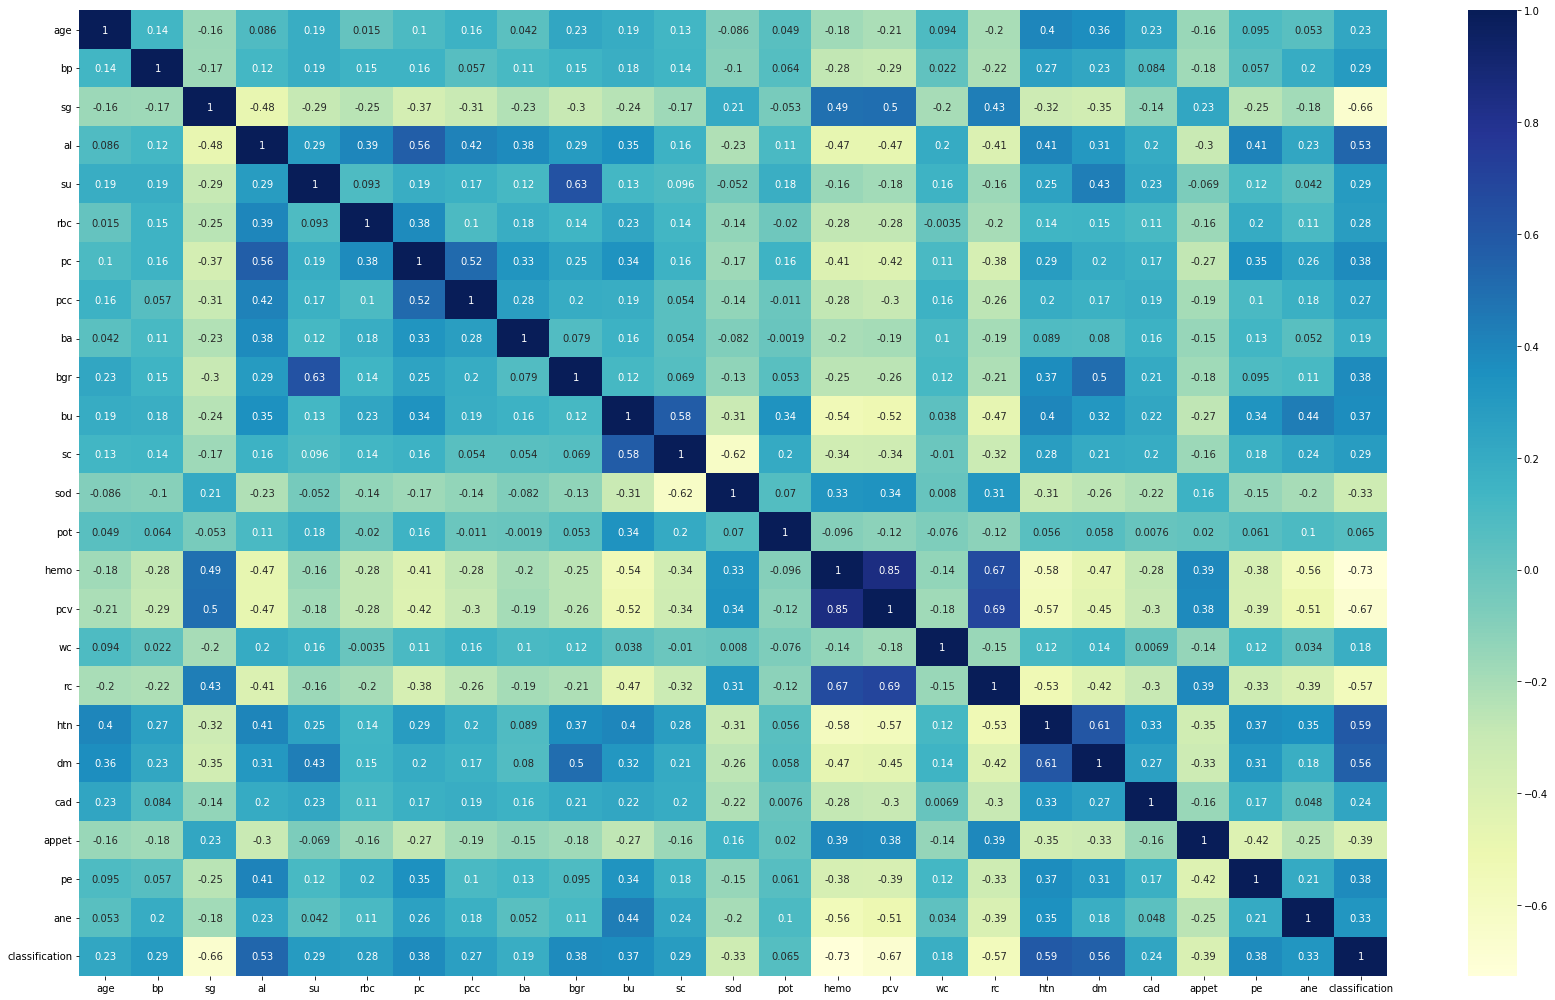

In [ ]:
# Criação do gráfico
plt.figure(figsize=(24, 14))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.tight_layout();



*Obs:*
*   *A variável "pcv" e "hemo" podem nos dar um problema chamado 85% **multicollinearity**;*
*   *Para resolver esse problema, eliminaremos a variável "pcv"* 






In [ ]:
# Eliminando a "pcv"
df.drop('pcv', axis = 1, inplace = True)

In [ ]:
# Conferindo...
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,0.0,121.0,...,15.4,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,0.0,121.0,...,11.3,6000.0,4.8,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,9.6,7500.0,4.8,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,11.2,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,11.6,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1


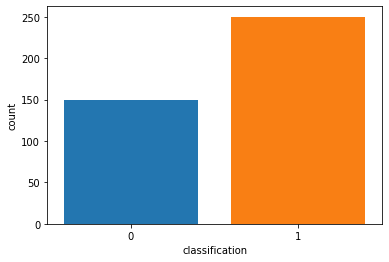

In [ ]:
# Visualizar no gráfico a variável "Target"
sns.countplot(df['classification'], saturation=0.95);

### SEPARAÇÃO DAS VARIÁVEIS EXPLICATIVAS (X)  E O Target (y) PARA TREINAR O ALGORITMO DA MÁQUINA PREDITIVA

In [ ]:
# Separando as Variáveis Explicativas em "X" e o Target (a variável que queremos prever, em "Y"):
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: classification, dtype: int64

# **2ª PARTE - Construindo a Máquina Preditiva com Machine Learning**

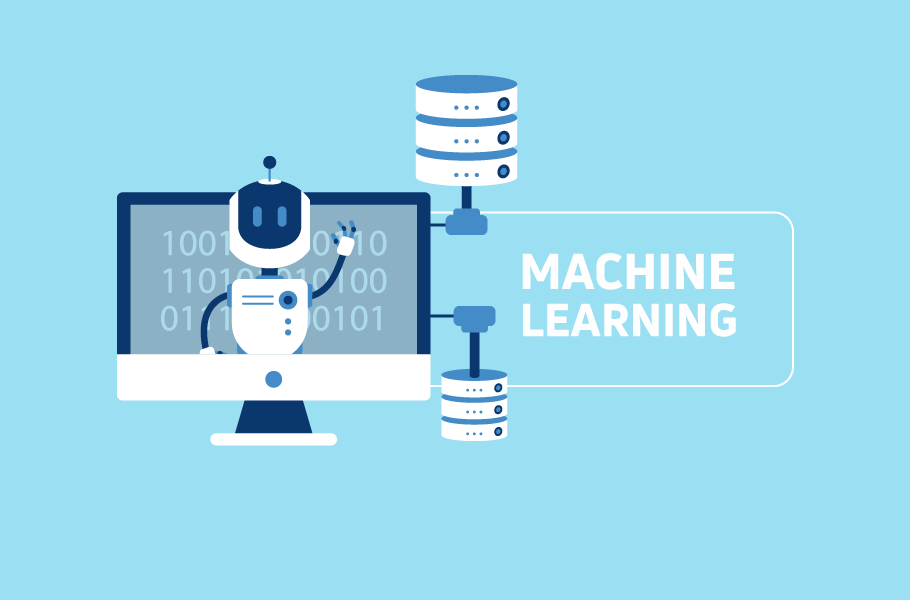

## CONSTRUÇÃO E AVALIAÇÃO DA MÁQUINA PREDITIVA

### DESCOBRIR QUAIS SÃO AS MELHORES VARIÁVEIS

In [ ]:
# Verificar quais são as features mais importantes
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
# Usando o ExtraTrees para mostrar as variáveis mais importantes
modelo = ExtraTreesClassifier()
modelo.fit(X, y)

ExtraTreesClassifier()

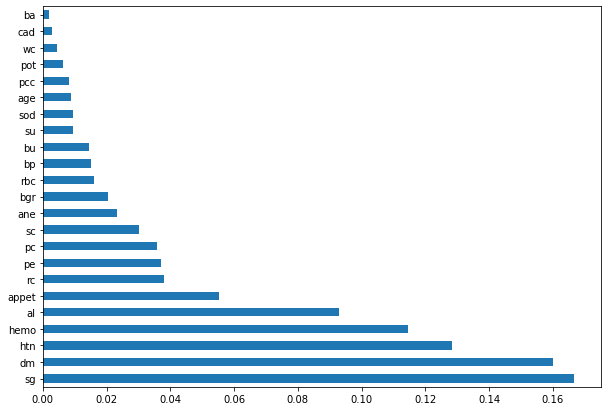

In [ ]:
# Criando o gráfico
plt.figure(figsize=(10,7))
ranked_features=pd.Series(modelo.feature_importances_,index=X.columns)
ranked_features.nlargest(24).plot(kind='barh')
plt.show();

**Escolherei apenas as 8 variáveis mais importantes para criar o modelo/baseline inicial**

In [ ]:
# Ranquear as 8 variáveis mais importantes
ranked_features.nlargest(8).index

Index(['sg', 'dm', 'htn', 'hemo', 'al', 'appet', 'rc', 'pe'], dtype='object')

### SEPARAR AS 8 MELHORES VARIÁVEIS PARA A MÁQUINA PREDITIVA

In [ ]:
# Separando as 8 variáveis mais importantes em "X" para que o algoritmo treine com esses dados
X = df[['sg', 'htn', 'hemo', 'dm', 'al', 'appet', 'rc', 'pc']]
X.head()

,sg,htn,hemo,dm,al,appet,rc,pc
0,1.020,1.0,15.4,1.0,1.0,1.0,5.2,0.0
1,1.020,0.0,11.3,0.0,4.0,1.0,4.8,0.0
2,1.010,0.0,9.6,1.0,2.0,0.0,4.8,0.0
3,1.005,1.0,11.2,0.0,4.0,0.0,3.9,1.0
4,1.010,0.0,11.6,0.0,2.0,1.0,4.6,0.0


In [ ]:
# Variável Target
y.head()

0    1
1    1
2    1
3    1
4    1
Name: classification, dtype: int64

### AMOSTRAGEM DOS DADOS PARA TREINAR (DADOS DE TREINO) PARA AVALIAR A MÁQUINA PREDITIVA (DADOS DE TESTE)

In [ ]:
# Train Test Split:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=33)

In [ ]:
# Impressão
print(X_train.shape)
print(X_test.shape)

(280, 8)
(120, 8)


*   ***Alguns algoritmos esperam receber dados na mesma escala. Nesse caso, não será obrigatório, pois os dados são não-paramétricos***




### CRIAR A BASELINE COM **RandomForest**

In [ ]:
# Importando as biliotecas nescessárias
# RandomForestClassifier:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Realizando o treinamento (fit) com os dados de treino
RandomForest = RandomForestClassifier()
RandomForest = RandomForest.fit(X_train,y_train)

In [ ]:
# Fazendo Previsões com dados de teste:
y_pred = RandomForest.predict(X_test)

In [ ]:
# Avaliando a Performance comparando com o gabarito (y) de teste:
print('Acurácia:', accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Acurácia: 0.975
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        58
           1       0.95      1.00      0.98        62

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



### USAR O ALGORITMO **GradientBoosting** PARA MELHORAR O MODELO DA MÁQUINA PREDITIVA

In [ ]:
# GradientBoostingClassifier:
from sklearn.ensemble import GradientBoostingClassifier
GradientBoost = GradientBoostingClassifier(n_estimators=2000)
GradientBoost = GradientBoost.fit(X_train,y_train)

In [ ]:
# Predição:
y_pred = GradientBoost.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))

print(classification_report(y_test,y_pred))

Accuracy: 0.9916666666666667
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      0.98      0.99        62

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



### SALVAR A MÁQUINA PREDITIVA

In [ ]:
# Criando um arquivo pickle para o classificador
import pickle
arquivo = 'Maquina_Preditiva.pkl'
pickle.dump(GradientBoost, open(arquivo, 'wb'))